<a href="https://colab.research.google.com/github/NicoVidoz/Nicolas-Vidoz/blob/main/PREENTREGA_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MOTIVACIÓN. AUDIENCIA. PREGUNTAS DE INTERÉS

## Motivación

El objetivo que este trabajo se propone es predecir el género musical de una canción, entre 11 clases diferentes, a partir de una serie intrínseca de características musicales que dicha canción posee. Lo que se busca es poder predecir cuales de esas variables y de qué forma me pueden determinar un género musical en particular.

## Audiencia

El modelo se piensa como una herramienta de utilidad en diferentes ámbitos vinculados a la industria musical. Particularmente, se propone servir como parte dentro de un proceso de generación de playlists en aplicaciones musicales, de manera tal que cuando un artista o una distribuidora de música lance y publique una producción en alguna aplicación, luego la misma pueda ser catalogada e incluida en diferentes playlists, que es la principal forma en la que se reproduce la música hoy en día. Así mismo, puede ser de utilidad en la producción y lanzamiento de nuevas canciones por parte de discográficas y artistas independientes.

## Metadata

El dataset elegido es el siguiente:
https://www.kaggle.com/datasets/purumalgi/music-genre-classification
Contiene 3 archivos: train.csv, test.csv y submission.csv. El archivo de entrenamiento y ajuste del modelo, es decir train.csv, posee 17.996 registros y 17 columnas. Los registros poseen información sobre el nombre de artista y de la canción y una serie variables inherentes a sus características y, finalmente, la variable “Class” que será nuestra variable target.
Los tipos de variables son los siguientes:
dtypes: float64(12), int64(3), object(2)


## Preguntas de interés

-	¿Existe relación entre el género musical de una canción y sus diferentes características musicales?
-	¿Hay géneros musicales más populares que otros? ¿Cuáles serían?
-	¿Qué características comparten entre sí los diferentes géneros?
-	¿Cómo incide cada variable en su género? ¿Con qué intensidad? ¿En qué sentido?
-	¿Se pueden determinar patrones?



# DATA ACQUISITION

Comenzamos importando las librerías y aplicaciones necesarias para desarrollar el proyecto

In [1]:
!pip install missingno #instalamos la api necesaria

In [2]:
#importamos las librerías que vamos a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import scipy as sp

Se monta el archivo de tipo csv a partir de los archivos descargados

In [3]:
df=pd.read_csv('/content/train.csv')

# DATA WRANGLING

Se da comienzo al proceso de Data Wrangling a partir del estudio de la estructura del dataset.

In [4]:
df.shape

(17996, 17)

El dataset contiene 17.996 registros (filas) y 17 variables (columnas), de las cuales 16 serán, a priori, variables dependientes y 1 dependiente.

In [5]:
df.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         17996 non-null  object 
 1   Track Name          17996 non-null  object 
 2   Popularity          17568 non-null  float64
 3   danceability        17996 non-null  float64
 4   energy              17996 non-null  float64
 5   key                 15982 non-null  float64
 6   loudness            17996 non-null  float64
 7   mode                17996 non-null  int64  
 8   speechiness         17996 non-null  float64
 9   acousticness        17996 non-null  float64
 10  instrumentalness    13619 non-null  float64
 11  liveness            17996 non-null  float64
 12  valence             17996 non-null  float64
 13  tempo               17996 non-null  float64
 14  duration_in min/ms  17996 non-null  float64
 15  time_signature      17996 non-null  int64  
 16  Clas

Se observan las 17 variables, sus nombres, su cantidad de datos nulos y el tipo de archivo del que se componen.

In [7]:
df.describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
Popularity,17568.0,44.512,17.427,1.000,33.000,44.000,56.000,100.000
danceability,17996.0,0.543,0.166,0.060,0.432,0.545,0.659,0.989
energy,17996.0,0.663,0.235,0.000,0.509,0.700,0.860,1.000
key,15982.0,5.952,3.197,1.000,3.000,6.000,9.000,11.000
loudness,17996.0,-7.911,4.049,-39.952,-9.538,-7.016,-5.189,1.355
mode,17996.0,0.637,0.481,0.000,0.000,1.000,1.000,1.000
speechiness,17996.0,0.080,0.084,0.022,0.035,0.047,0.083,0.955
acousticness,17996.0,0.247,0.311,0.000,0.004,0.081,0.434,0.996
instrumentalness,13619.0,0.178,0.304,0.000,0.000,0.004,0.200,0.996
liveness,17996.0,0.196,0.159,0.012,0.098,0.129,0.258,1.000


Aquí ya podemos observar los valores mas importantes de estadística descriptiva de cada variable numérica: medidas de tendencia central, medidas de dispersión y cuartiles.

In [8]:
df.describe(include='object')

,Artist Name,Track Name
count,17996,17996
unique,9149,15129
top,Backstreet Boys,Dreams
freq,69,9


Aquí observamos ciertos indicadores de las dos variables categóricas

Verificación de duplicados:

In [9]:
df.duplicated().sum()

0

Procedemos con el tratamiento de valores nulos

In [10]:
df.isnull().sum()

Artist Name              0
Track Name               0
Popularity             428
danceability             0
energy                   0
key                   2014
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      4377
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

In [11]:
pd.set_option('display.max_rows', None)
serie=(df.isnull().sum()/df.shape[0])*100
serie=serie.sort_values(ascending=False)
serie= serie[serie>0]
serie

instrumentalness    24.322072
key                 11.191376
Popularity           2.378306
dtype: float64

Se observa que tres de las variables poseen datos nulos, 'Popularity', 'key' e 'instrumentalness'. Si bien la proporción de nulos de la variable "Popularity" es baja, no lo es en los otros dos casos, de modo que se decide proceder con un proceso de reemplazo que no implique la eliminación de registros en las tres variables.

<Axes: >

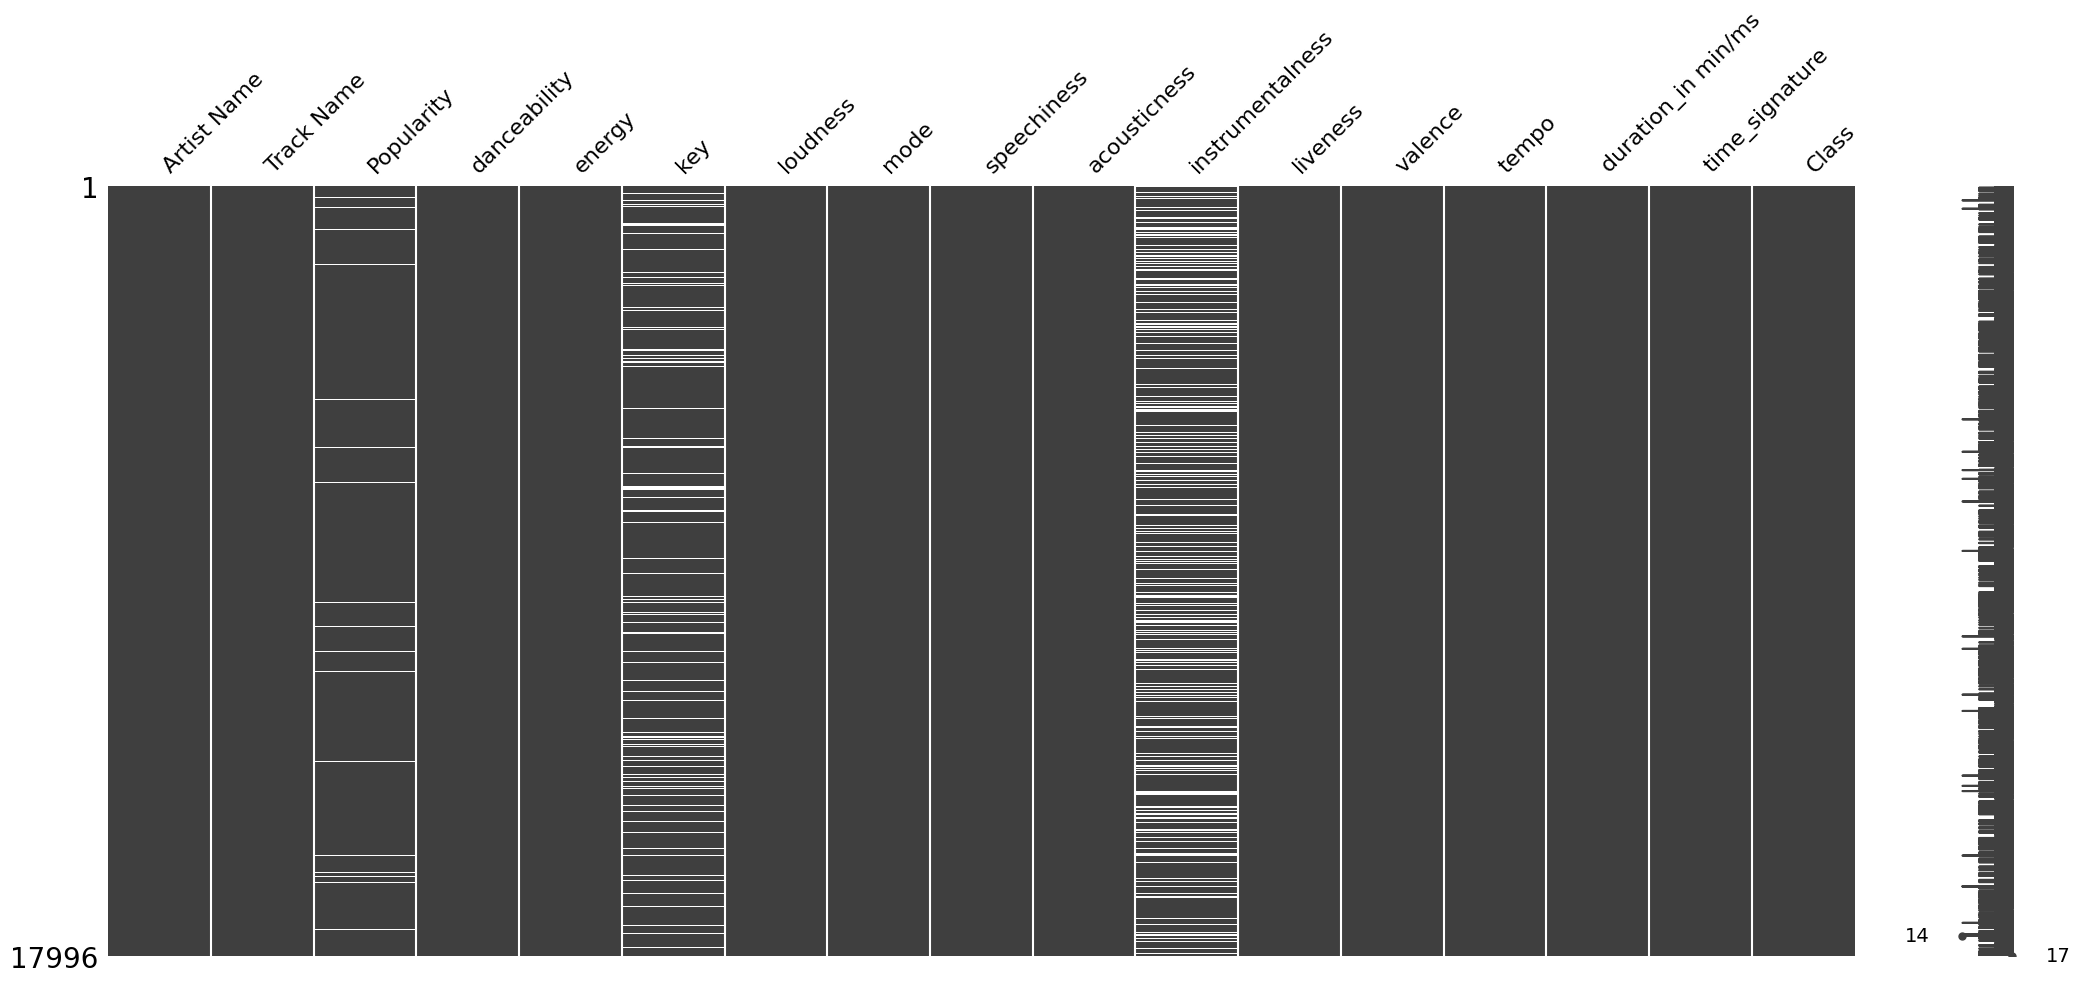

In [12]:
msno.matrix(df)

Se observa que tres de las variables poseen datos nulos, 'Popularity', 'key' e 'instrumentalness'. La matriz nos permite observar el fenómeno de manera gráfica y simple.

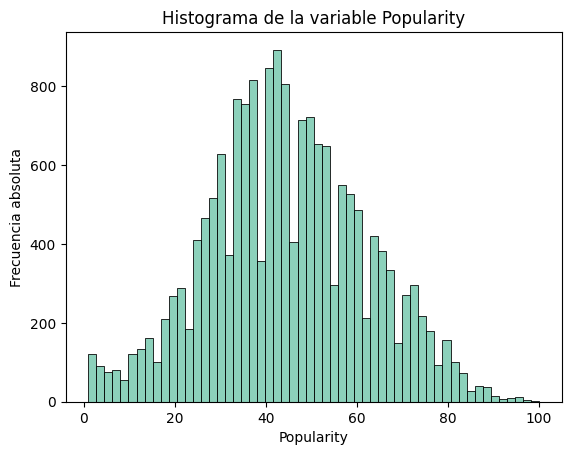

In [13]:
palette = sns.color_palette("Set2")
sns.set_palette(palette)
sns.histplot(df['Popularity'])
plt.title('Histograma de la variable Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frecuencia absoluta')
plt.show()

In [14]:
df.Popularity.mean()

44.51212431693989

In [15]:
df.Popularity.median()

44.0

En la variable se aprecia una distribución símetrica, de modo que se puede proceder a reemplazar valores nulos por la media, 44.51.

In [16]:
df['Popularity'].fillna(df['Popularity'].mean(), inplace=True)

In [17]:
df.Popularity.isnull().sum()

0

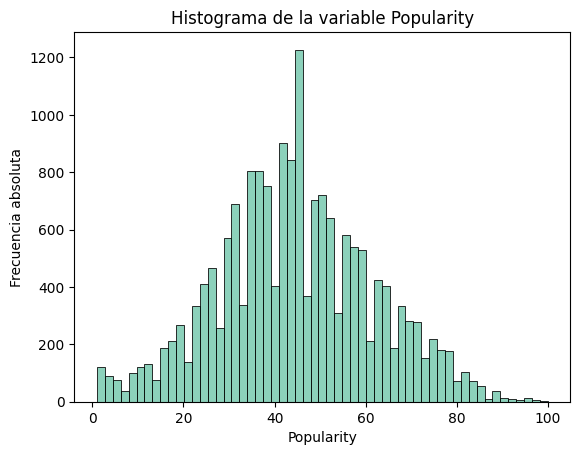

In [18]:
palette = sns.color_palette("Set2")
sns.set_palette(palette)
sns.histplot(df['Popularity'])
plt.title('Histograma de la variable Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frecuencia absoluta')
plt.show()

Se corroboran la ausencia de nulos y que no se vea afectada la distribución de la variable; si se observa, en cambio, el aumento de frecuencia en la media.

'key' es la representación de la tonalidad de una canción, de modo que si se toma como variable categórica podemos reemplazar datos nulos tomando la moda. A su vez, siendo pues una variable categórica "encodeada", conviene analazirla mediante un gráfico de barras.

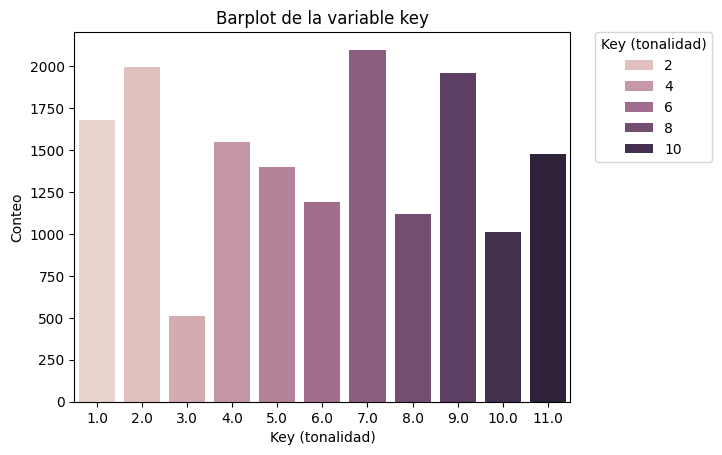

In [19]:
sns.countplot(x="key", data=df, hue='key')
plt.title('Barplot de la variable key')
legend=plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
legend.set_title('Key (tonalidad)')
plt.xlabel('Key (tonalidad)')
plt.ylabel('Conteo')
plt.show()

Según se observa, la moda se encuentra en el valor 7, que se correponde con la tonalidad de Sol.

Estudiemos ahora que sucede con la variable 'key' si seccionamos el análisis por los diferentes géneros musicales posibles:

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<function matplotlib.pyplot.show(close=None, block=None)>

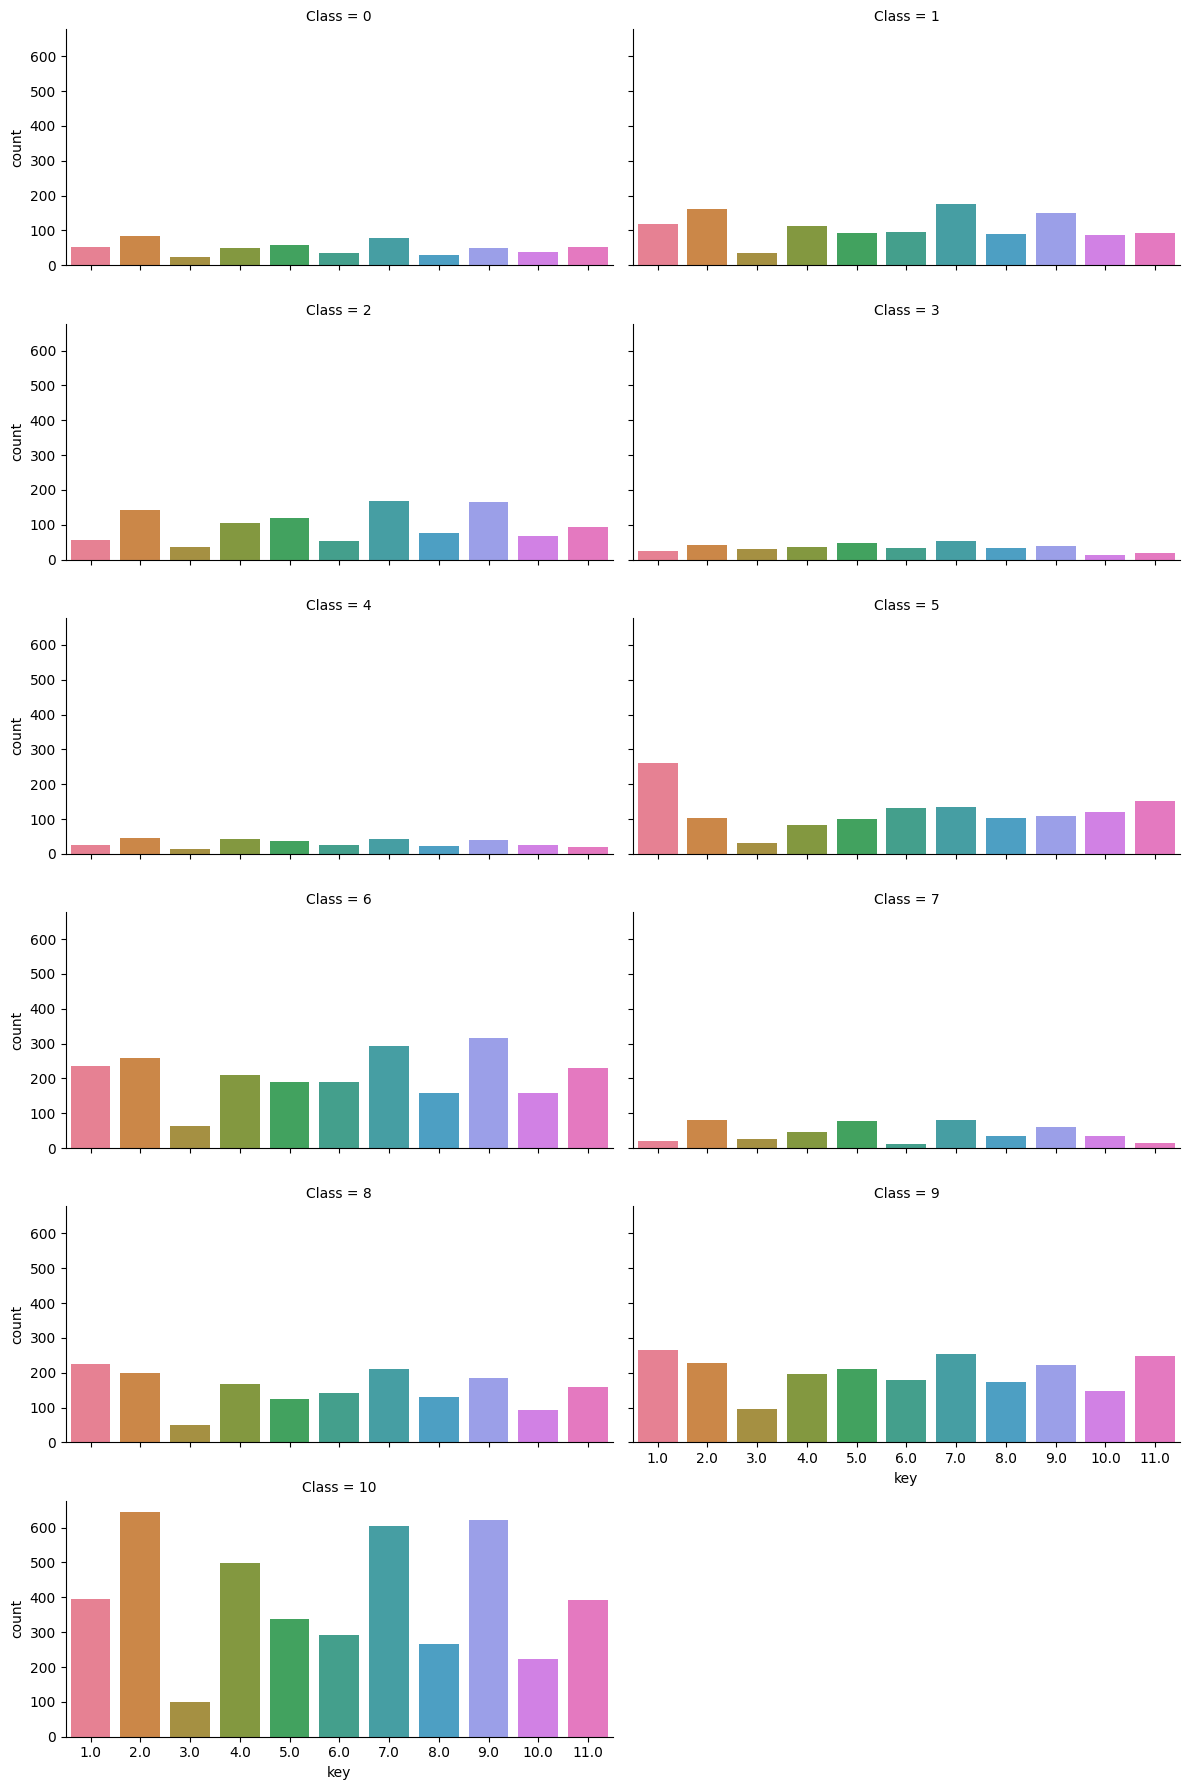

In [20]:
palette = sns.color_palette("Set2")
sns.set_palette(palette)
n = sns.FacetGrid(df, col="Class", margin_titles=True, col_wrap=2, aspect=2, hue='key', row_order=df['Class'].unique)
n.map(sns.countplot, "key")
plt.show

In [21]:
keygroup = df['key'].groupby(df['Class'])
keygroup.apply(lambda x: x.mode())

Class   
0      0    2.0
1      0    7.0
2      0    7.0
3      0    7.0
4      0    2.0
5      0    1.0
6      0    9.0
7      0    2.0
8      0    1.0
9      0    1.0
10     0    2.0
Name: key, dtype: float64

Vemos pues que la moda varía según se trate de cada género musical. En esta instancia de trabajo se procederá a reemplazar valores por la moda del total de registros, pero en futuras instancias se evaluará la necesidad de aplicar un método de reemplazo que considere la moda dentro de cada género musical.

In [22]:
df['key'].fillna(7, inplace=True)

In [23]:
df.key.isnull().sum()

0

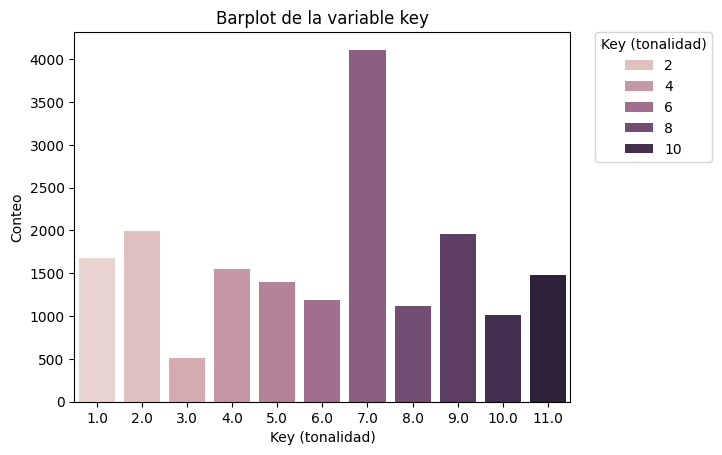

In [24]:
palette = sns.color_palette("Set2")
sns.set_palette(palette)
sns.countplot(x="key", data=df, hue='key')
legend=plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
legend.set_title('Key (tonalidad)')
plt.title('Barplot de la variable key')
plt.xlabel('Key (tonalidad)')
plt.ylabel('Conteo')
plt.show()

Como se puede observar, el proceso de reemplazo efectuado fue exitoso.

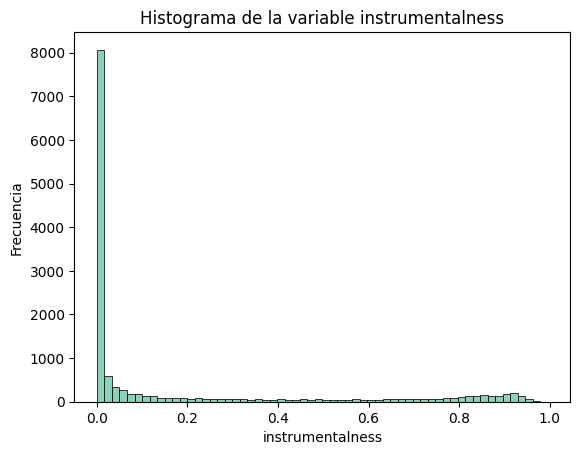

In [25]:
palette = sns.color_palette("Set2")
sns.set_palette(palette)
sns.histplot(df['instrumentalness'])
plt.title('Histograma de la variable instrumentalness')
plt.xlabel('instrumentalness')
plt.ylabel('Frecuencia')
plt.show()

In [26]:
df.instrumentalness.value_counts()

instrumentalness
0.000109    20
0.929000    19
0.914000    18
0.892000    17
0.899000    17
0.112000    17
0.927000    17
0.925000    16
0.918000    16
0.001240    16
0.125000    16
0.010200    16
0.897000    16
0.902000    15
0.922000    15
0.932000    15
0.000171    15
0.827000    15
0.854000    15
0.906000    15
0.850000    15
0.919000    14
0.010300    14
0.880000    14
0.920000    14
0.111000    14
0.108000    14
0.000010    14
0.000011    13
0.001050    13
0.937000    13
0.001040    13
0.908000    13
0.000015    13
0.025900    13
0.826000    13
0.928000    13
0.916000    13
0.862000    13
0.878000    13
0.917000    13
0.124000    13
0.000132    13
0.000014    13
0.940000    12
0.794000    12
0.871000    12
0.000443    12
0.868000    12
0.835000    12
0.901000    12
0.776000    12
0.817000    12
0.000011    12
0.000158    12
0.904000    12
0.000167    12
0.011900    12
0.869000    12
0.849000    12
0.857000    12
0.000018    12
0.001100    12
0.010100    12
0.012000    12
0.855000

In [27]:
df.instrumentalness.mean()

0.1775619253660327

In [28]:
df.instrumentalness.median()

0.00391

In [29]:
df.instrumentalness.mode()

0    0.000109
Name: instrumentalness, dtype: float64

El análisis de la distribución de la variable "instrumentalness" nos muestra una situación atípica, dado que la distribución es sesgada a derecha y a su vez la moda se encuentra en un valor extremo. Un análisis lógico de la variable que estamos tratando y su consecuente interpretación -0 indica canciones con mucha instrumentalidad y 1 canciones sin instrumentos- nos indica que probablemente corresponda aplicar la mediana a los valores nulos, dado que no se trata de outliers ó error de datos, sino que realmente se expresa un fenómeno real.

In [30]:
df['instrumentalness'].fillna(df['instrumentalness'].median(), inplace=True)

In [31]:
df.instrumentalness.isnull().sum()

0

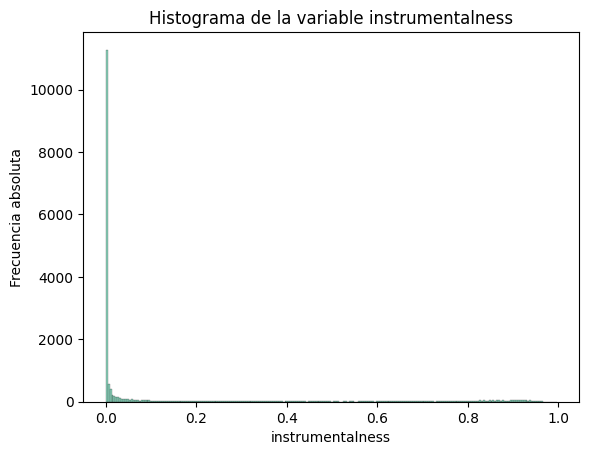

In [32]:
palette = sns.color_palette("Set2")
sns.set_palette(palette)
sns.histplot(df['instrumentalness'])
plt.title('Histograma de la variable instrumentalness')
plt.xlabel('instrumentalness')
plt.ylabel('Frecuencia absoluta')
plt.show()

Corrobamos que, posterior al proceso de reemplazo, la variable no cuenta con valores nulos y que la forma de su distribución no se vió significativamente afectada (si bien se observa claramente el aumento de la frecuencia de la mediana)

# EXPLORATORY DATA ANALYSIS

## Análisis Univariado

El análisis comienza con un estudio de los principales medidas estadísitcas de cada variable. De acuerdo a la escala que abarcan y al tipo de variable se implementan diferentes gráficas:

 Primeramente se observa que existen variables con escalas muy discimiles, lo que obligará a efectuar, previo al modelado, un proceso de normalización.

In [33]:
dfuniv = df.drop(['key','mode', 'duration_in min/ms','tempo','Popularity', 'loudness','Class','time_signature'], axis=1)

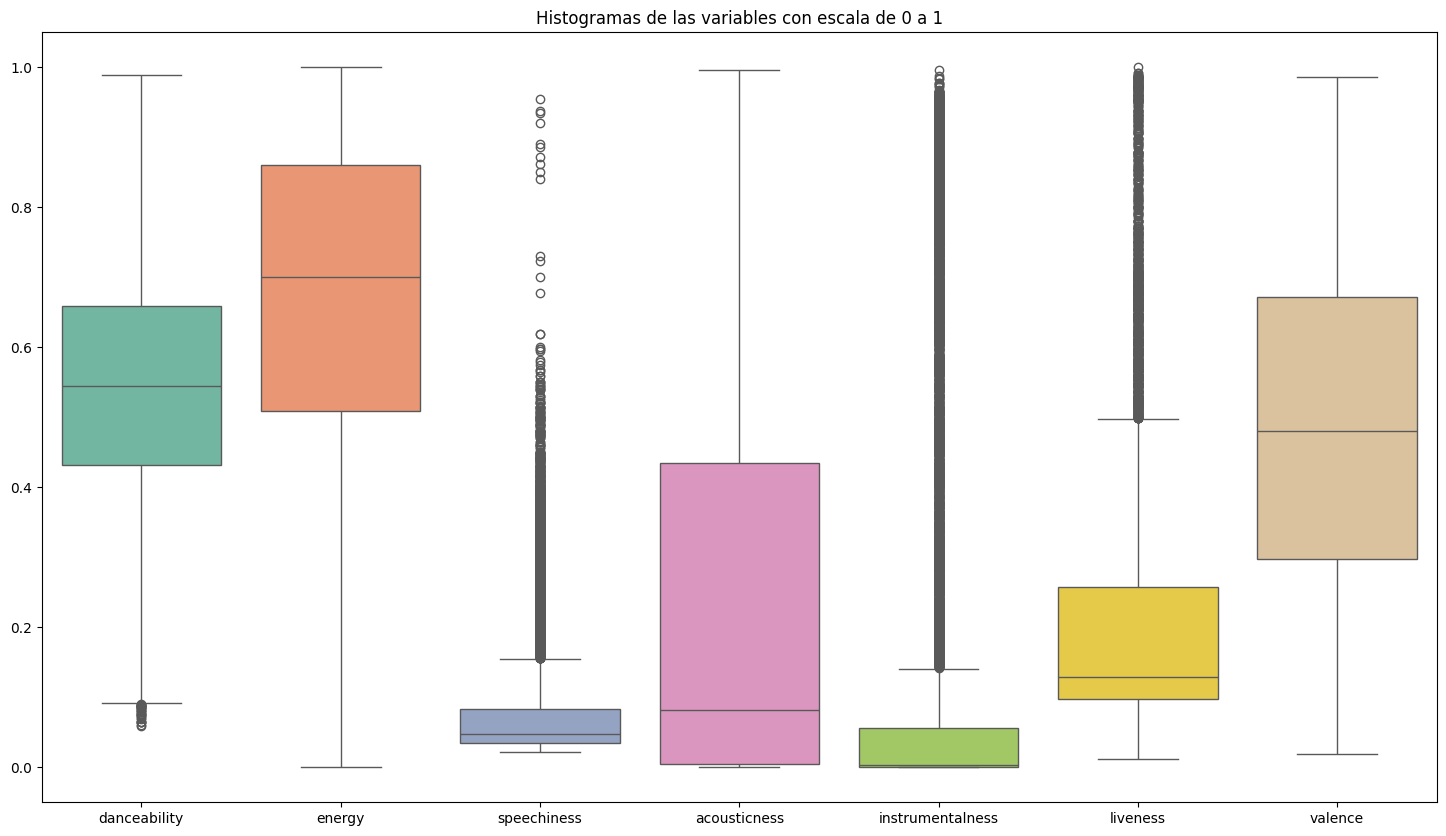

In [34]:
plt.figure(figsize=(18,10))
plt.title('Histogramas de las variables con escala de 0 a 1')
sns.boxplot(data=dfuniv)
plt.show()

<ipython-input-35-4dd85d752186>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dfuniv[variable], ax=axes[j])
<ipython-input-35-4dd85d752186>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dfuniv[variable], ax=axes[j])
<ipython-input-35-4dd85d752186>:11: UserWarning: 

`distplot` is a depre

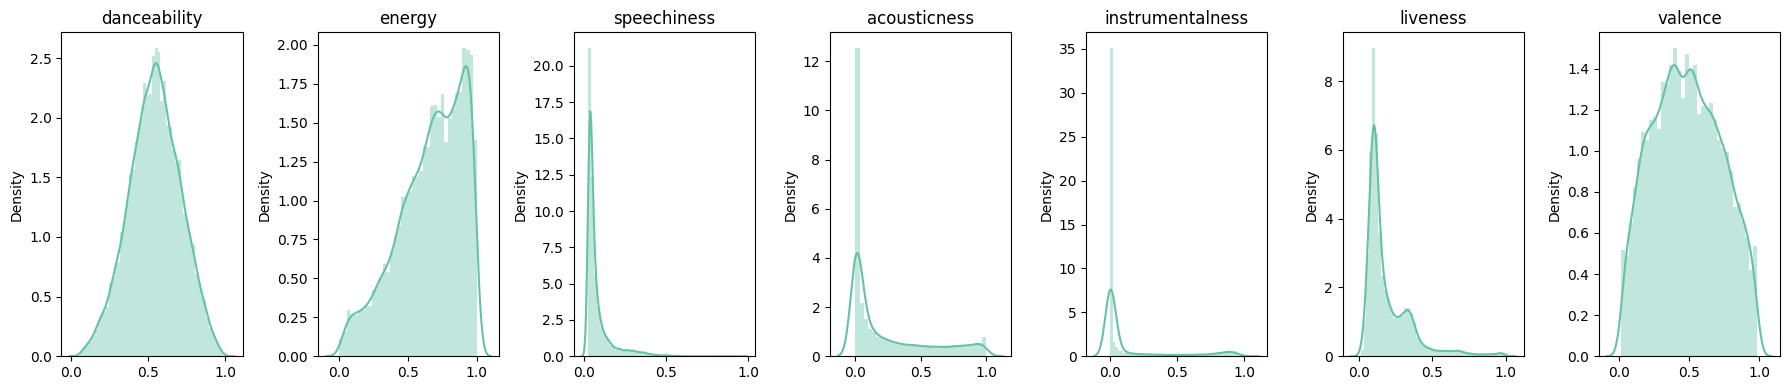

In [35]:
variables = ['danceability', 'energy', 'speechiness', 'acousticness',
            'instrumentalness', 'liveness', 'valence']

columns = 7

fig, axes = plt.subplots(len(variables) //columns, columns, figsize=(18,4))

for current_idx, variable in enumerate(variables):
    i = current_idx // columns
    j = current_idx % columns
    sns.distplot(dfuniv[variable], ax=axes[j])
    axes[j].set_title(variable)
    axes[j].set_xlabel("")

plt.tight_layout()

De lo osbervado en el conjunto de variables con escala similar se infiere que:
- con excepción de las variables "danceability" y "valence", las demás no cuentan con una distribución simétrica.
-"specchiness", "acousticness", "instrumentalness" y "liveness" presentan sesgo a derecha y una dispersión fuerte, con un conjunto de outliers bastante alejados de sus valores medios.
- "energy" si bien muestra un sesgo a izquierda, parece tener una dispersión más contenida y no posee outliers.

In [36]:
fig = px.box(df, x="duration_in min/ms")
fig.show()

Se observa sesgo con cola derecha y que posee outliers muy por fuera del límite superior, denotando una dispersión alta.

In [37]:
fig = px.box(df, x="tempo")
fig.show()

Aquí si bien existen valores outliers por debajo y por encima de los límites, dentro de los mismos la distribución tiende a ser normal.

In [38]:
fig = px.box(df, x="loudness")
fig.show()

Aqui se osberva una distribución con un alto sesgo a la izquierda, con un valores muy por debajo del límite estadístico inferior definido por la figura.

Procedemos ahora con las variables categóricas, mediante gráficos de barras:

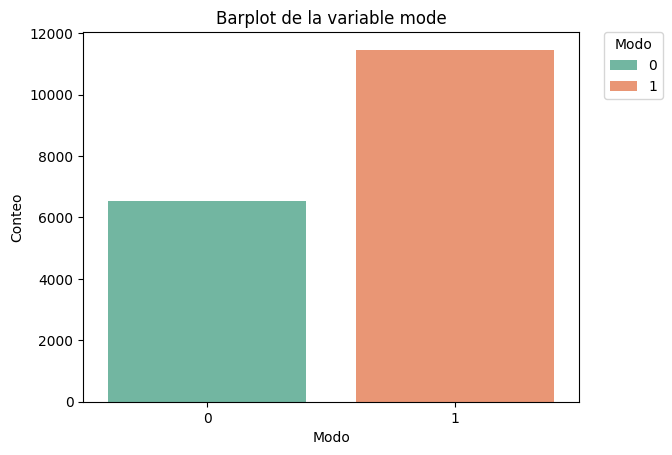

In [39]:
sns.countplot(x="mode", data=df, hue='mode')
plt.title('Barplot de la variable mode')
legend=plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
legend.set_title('Modo')
plt.xlabel('Modo')
plt.ylabel('Conteo')
plt.show()

In [40]:
df['mode'].value_counts()

mode
1    11459
0     6537
Name: count, dtype: int64

Aqui se observa sencillamente que predominan las canciones en modos mayores, representados por el valor 1.

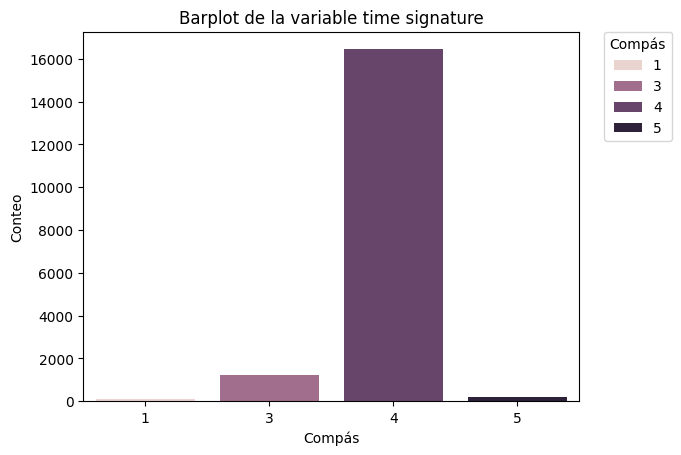

In [41]:
sns.countplot(x="time_signature", data=df, hue='time_signature')
plt.title('Barplot de la variable time signature')
legend=plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
legend.set_title('Compás')
plt.xlabel('Compás')
plt.ylabel('Conteo')
plt.show()

In [42]:
df['time_signature'].value_counts()

time_signature
4    16451
3     1228
5      203
1      114
Name: count, dtype: int64

Se observa una predominancia muy marcada por el compás de 4/4, lo cual resulta bastante lógico en el contexto de la música actual; en segundo lugar observamos el valor 3 que representa un compás de 3/4.

### Análisis de variable target

In [43]:
df['Class'].value_counts()

Class
10    4949
6     2587
9     2524
8     1854
5     1447
1     1373
2     1272
0      625
7      576
3      402
4      387
Name: count, dtype: int64

In [44]:
df.Class.unique()

array([ 5, 10,  6,  2,  4,  8,  9,  3,  7,  1,  0])

In [45]:
df['Class'].isnull().sum()

0

Analizando la variable target del modelo observamos dos cuestiones importantes:
- posee un desbalance entre sus categóricos
- no posee valores nulos.

### Medidas de dispersión. Asimetría y Curtosis

In [46]:
sp.stats.describe(df.danceability)

DescribeResult(nobs=17996, minmax=(0.0596, 0.989), mean=0.5434332184929985, variance=0.027645207297692966, skewness=-0.08351496160434463, kurtosis=-0.2839897014411661)

Observamos pues que una desviación estándar de 0.16, los datos estan relativente próximos a la media. Un skew de -0.08 nos indica simetría en su forma. Por úlitmo, vemos que la kurtosis (indicador del achatamiento o elevación de una distribución) de -0.28 nos indica que es, si bien negativa, esta bastante próxima a una distribución normal.

In [47]:
sp.stats.describe(df.energy)

DescribeResult(nobs=17996, minmax=(2.03e-05, 1.0), mean=0.6627767470715714, variance=0.055400625612432274, skewness=-0.6611140008046469, kurtosis=-0.31718163059906335)

Se observa una desviación estándar en 0.23, lo cual indica una dispersión mayor. El skweness en -0.66 indica una asimetría moderada (a izquierda en este caso) y finalmente la kurtosis en -0.31 indica que la forma es levemente más achatada en relación a una distribució normal.

In [48]:
sp.stats.describe(df.speechiness)

DescribeResult(nobs=17996, minmax=(0.0225, 0.955), mean=0.07970699599911092, variance=0.006984958327824602, skewness=3.0877449599652707, kurtosis=12.664274900613043)

Aquí conviene resaltar una distribución claramente atípica, con un valor de skewness en 3.08 se verifica una marcada cola a la derecha; el valor de kurtosis en 12.66 indica que la campana es fuertemente más alta que en una distribución normal.

In [49]:
sp.stats.describe(df.acousticness)

DescribeResult(nobs=17996, minmax=(0.0, 0.996), mean=0.24708167183929763, variance=0.0964923868937078, skewness=1.1054048985892557, kurtosis=-0.17942258741395767)

Una desviación estándar en 0.31, sobre una escala que va de 0 a 1, habla de una gran dispersión. El skew, si bien no tanto como en el caso anterior, representa una figura asimétrica a derecha. La kurtosis en -0.17 refleja una campana levemente más baja que la campana normal (cuyo valor sería 0).

In [50]:
sp.stats.describe(df.instrumentalness)

DescribeResult(nobs=17996, minmax=(1e-06, 0.996), mean=0.1353261797932874, variance=0.07551031641513843, skewness=1.9726388214791952, kurtosis=2.3297063248925207)

La figura representa una forma sesgada a derecha, dado su valor de skewness. La forma de la campana es levemente más elevada que la de una distribución normal.

In [51]:
sp.stats.describe(df.liveness)

DescribeResult(nobs=17996, minmax=(0.0119, 1.0), mean=0.19616990442320514, variance=0.02534835570437542, skewness=2.1758907571153787, kurtosis=5.631498159513434)

El valor de skewness indica una asimetría marcada a la derecha. El valor de curtosis es elevado, de modo que la forma de la campana es bastante afilada.

In [52]:
sp.stats.describe(df.valence)

DescribeResult(nobs=17996, minmax=(0.0183, 0.986), mean=0.486208490775728, variance=0.057693760592531805, skewness=0.08992063151288378, kurtosis=-0.9160422645310748)

Aquí se observa una distribución prácticamente normal en todos sus indicadores.

In [53]:
sp.stats.describe(df['duration_in min/ms'])

DescribeResult(nobs=17996, minmax=(0.50165, 1477187.0), mean=200744.45885108635, variance=12541564595.462492, skewness=0.84685938212447, kurtosis=8.663752564692688)

Resalta en este caso la desviación estándar, indicando pues una dispersión muy fuerte. El skew es moderado, levemente asimétrico a derecha, y la curtosis exhibe un valor alto, es decir una campana muy elevada.

In [54]:
sp.stats.describe(df.tempo)

DescribeResult(nobs=17996, minmax=(30.557, 217.416), mean=122.62329400977995, variance=874.4752294584828, skewness=0.3795872531541212, kurtosis=-0.4474135345316812)

El skew en 0.37 indica una forma muy cercana a simétrica. La curtosis indica una campana de altura muy próxima a la normal.

In [55]:
sp.stats.describe(df.loudness)

DescribeResult(nobs=17996, minmax=(-39.952, 1.355), mean=-7.9106597577239395, variance=16.395623871058437, skewness=-1.7612366425831913, kurtosis=5.0360080067478865)

La desviación estándar es de 4.04, lo cual indica que existe dispersión. El skewness en -1.76 indica una asimetría a izquierda bastante marcada y, finalmente, la curtosis en 5.03 indica una forma de campana fuertemente elevada con colas débiles.

## Análisis Bivariado

### Correlaciones en general

Primeramente se genera un dataset que contiene únicamente las variables numéricas, a efectos de poder ejecutar la matriz de correlación.

In [56]:
numericos = df.select_dtypes(include=['number'])
matrix=numericos.corr()
matrix
#se utiliza el sistema de correlación por defecto (Pearson)

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
Popularity,1.000000,0.165462,0.050696,0.005267,0.122269,0.016398,0.031305,-0.123409,-0.170398,-0.071693,0.054106,-0.005974,-0.030500,0.066188,0.158278
danceability,0.165462,1.000000,-0.093838,0.005660,0.059723,-0.067135,0.199042,0.009055,-0.219255,-0.109485,0.444548,-0.183527,-0.121624,0.137455,-0.097681
energy,0.050696,-0.093838,1.000000,0.011090,0.767869,-0.035880,0.125427,-0.745963,-0.151817,0.195634,0.222998,0.210224,0.245768,0.145281,0.217328
key,0.005267,0.005660,0.011090,1.000000,0.000395,-0.094606,-0.003230,-0.006544,0.002558,0.015468,0.031422,0.013341,0.012032,0.004881,-0.007495
loudness,0.122269,0.059723,0.767869,0.000395,1.000000,-0.033650,0.096027,-0.612824,-0.348796,0.112022,0.181086,0.164272,0.172010,0.127775,0.177872
mode,0.016398,-0.067135,-0.035880,-0.094606,-0.033650,1.000000,-0.074609,0.024035,-0.016565,-0.001563,-0.002986,0.021211,-0.069307,-0.019989,-0.044740
speechiness,0.031305,0.199042,0.125427,-0.003230,0.096027,-0.074609,1.000000,-0.086648,-0.100555,0.070406,0.053885,0.048948,0.005044,0.056237,-0.059349
acousticness,-0.123409,0.009055,-0.745963,-0.006544,-0.612824,0.024035,-0.086648,1.000000,0.146809,-0.111393,-0.122547,-0.168318,-0.322583,-0.133936,-0.237138
instrumentalness,-0.170398,-0.219255,-0.151817,0.002558,-0.348796,-0.016565,-0.100555,0.146809,1.000000,-0.041411,-0.223621,-0.028771,0.036411,-0.072357,-0.038072
liveness,-0.071693,-0.109485,0.195634,0.015468,0.112022,-0.001563,0.070406,-0.111393,-0.041411,1.000000,0.021076,0.033515,0.053885,0.021546,0.045309


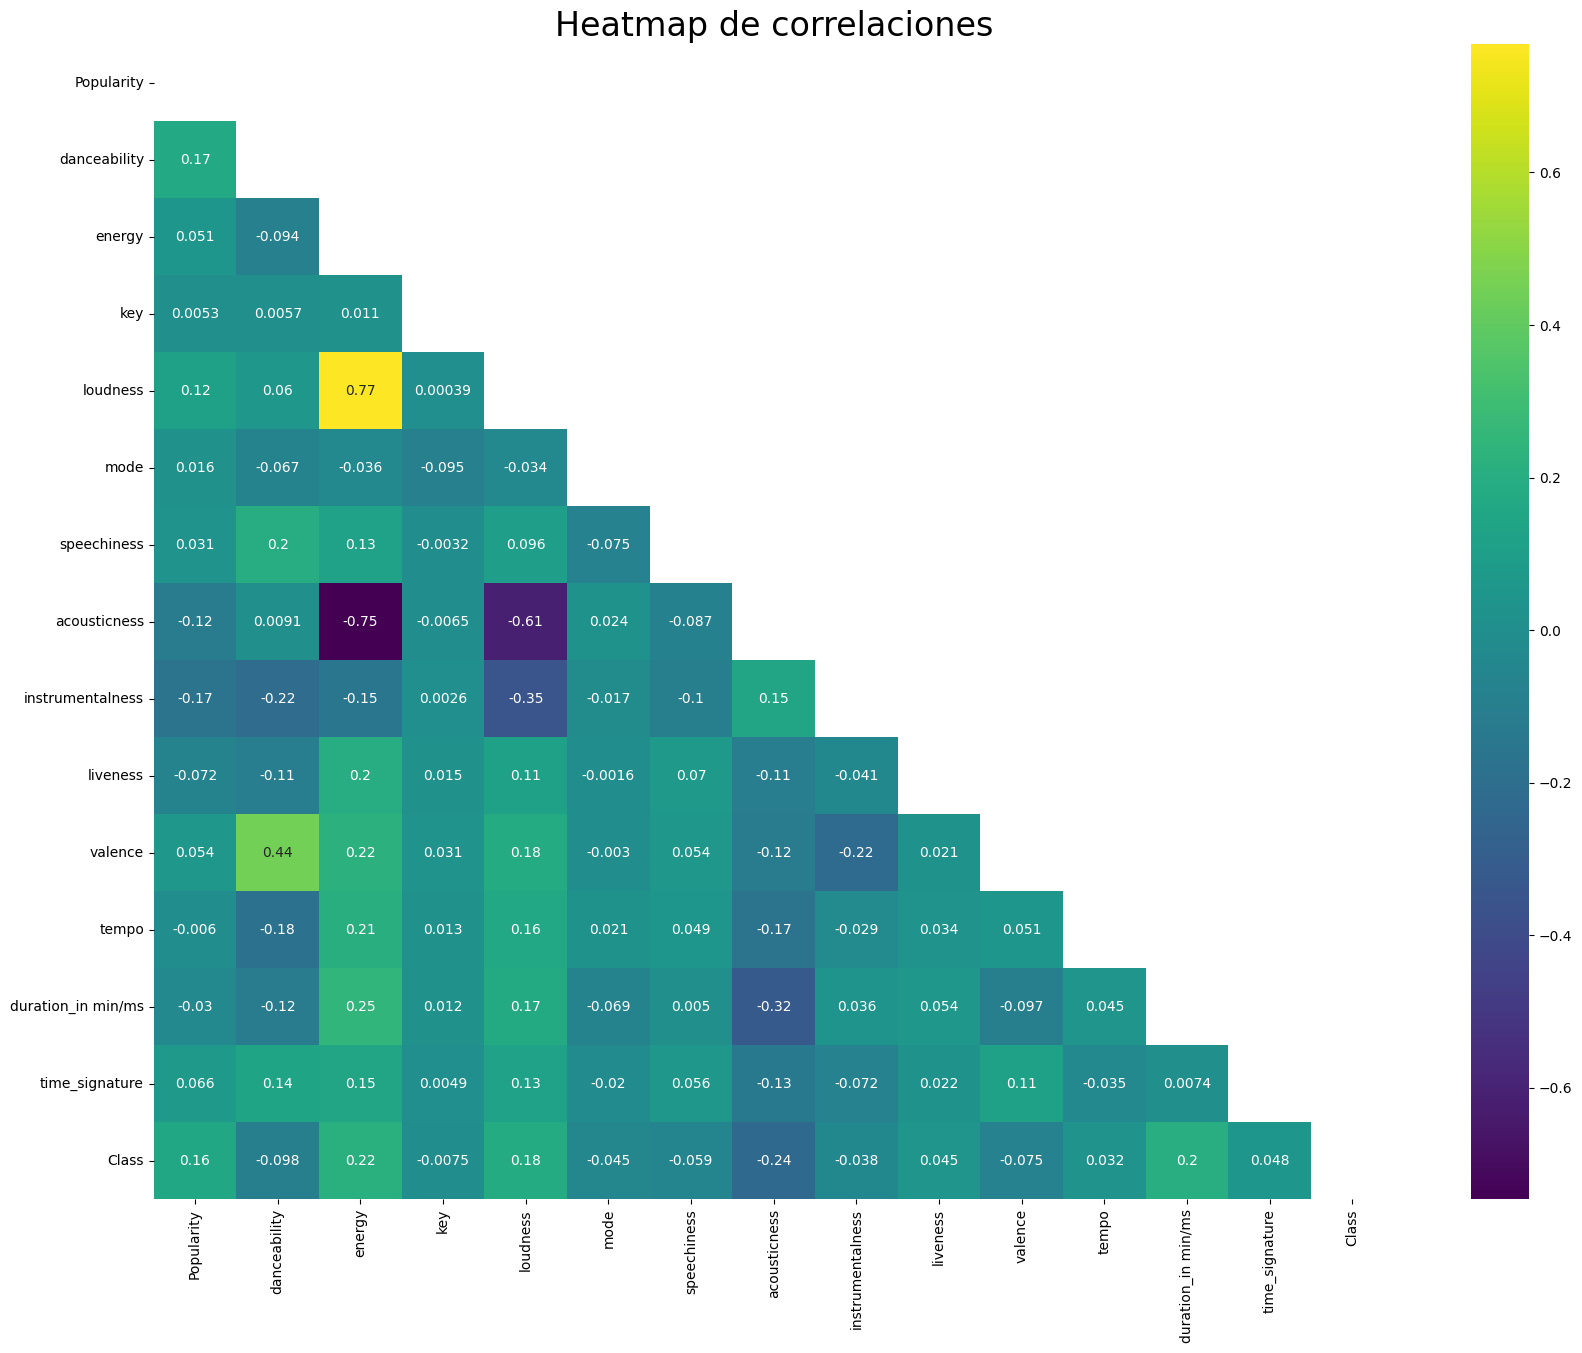

In [57]:
plt.rcParams['figure.figsize'] = (20, 15)
corr_matrix=numericos.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(numericos.corr(), mask=mask, annot = True, cmap='viridis')
plt.title('Heatmap de correlaciones', fontsize = 24)
plt.show()

El mapa de calor contiene la misma información que la matriz, pero facilita la lectura de la misma. Los resultados mas notorios son los siguientes:
- Se observa una correlación positiva fuerte entre "loudness" y "energy". Asi mismo, la variable "acousticness" muestra correlación negativa con "energy" y con "loudness".
El resultado obentido demandará que, previo a implementar el ajuste y entrenamiento de un modelo algorítimico, se analice la necesidad de eliminar alguna o algunas de las variables independientes correlacionadas, a efectos de mejor la performance del mismo.
- la variable target, "Class", no posee correlaciones fuertes con ninguna variable indepentiente y posee casi nula correlación con "key". Dicho de otro modo, la tonalidad de las canciones no guarda relación con su género musical.

### Glosario de "Class"

A efectos de mejor interpretar las gráficas, se ofrece la siguiente información:

In [58]:
clases=pd.read_csv('/content/submission.csv') # A efectos de tener las referencia de Clase
clases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7713 entries, 0 to 7712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Acoustic/Folk_0  7713 non-null   int64
 1   Alt_Music_1      7713 non-null   int64
 2   Blues_2          7713 non-null   int64
 3   Bollywood_3      7713 non-null   int64
 4   Country_4        7713 non-null   int64
 5   HipHop_5         7713 non-null   int64
 6   Indie Alt_6      7713 non-null   int64
 7   Instrumental_7   7713 non-null   int64
 8   Metal_8          7713 non-null   int64
 9   Pop_9            7713 non-null   int64
 10  Rock_10          7713 non-null   int64
dtypes: int64(11)
memory usage: 663.0 KB


### Correlaciones uno a uno

<ipython-input-59-53efaaace252>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




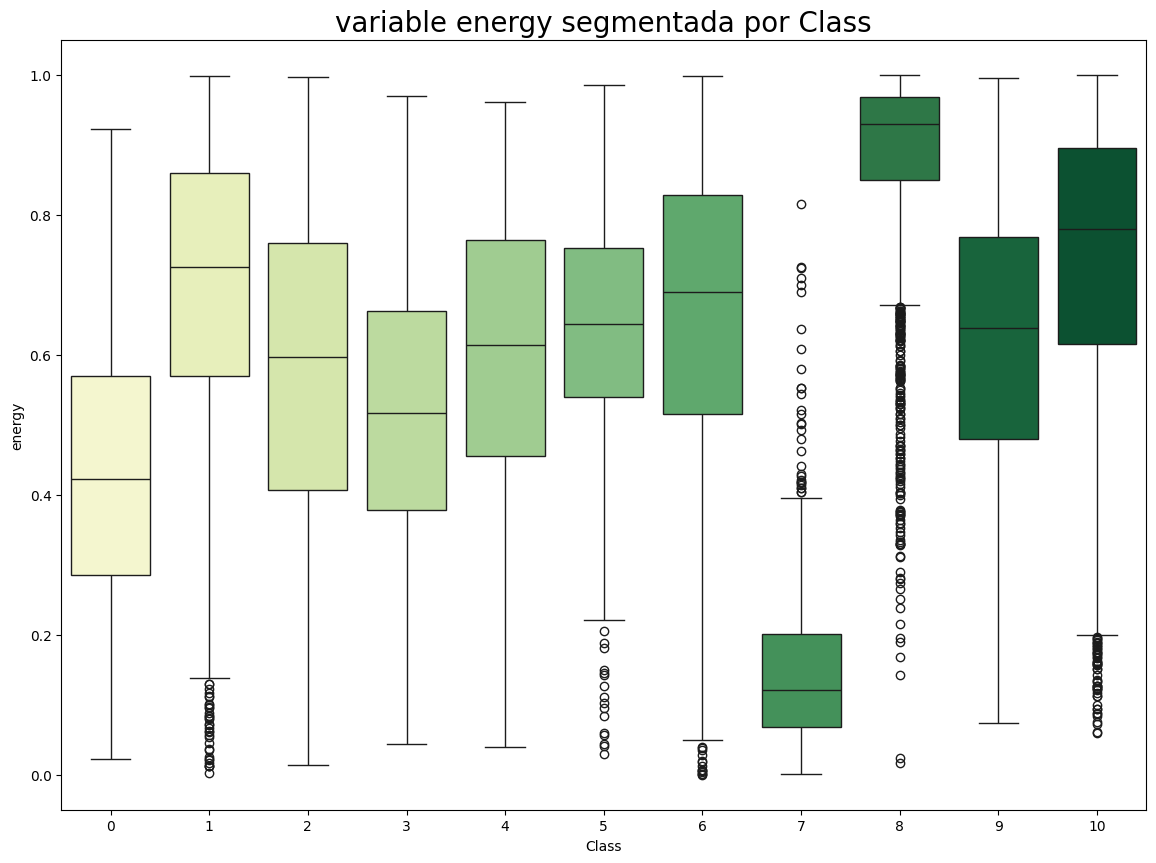

In [59]:
plt.rcParams['figure.figsize'] = (14,10)
sns.boxplot(x='Class', y='energy', data=numericos, palette = 'YlGn')
plt.title('variable energy segmentada por Class', fontsize = 20)
plt.show()

Se observa que, lógicamente, la variable "energy" muestra diferentes medidas de tendencia central y dispersión de acuero a cada género musical de que se trate.

<ipython-input-60-1c9d7a68ff6a>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




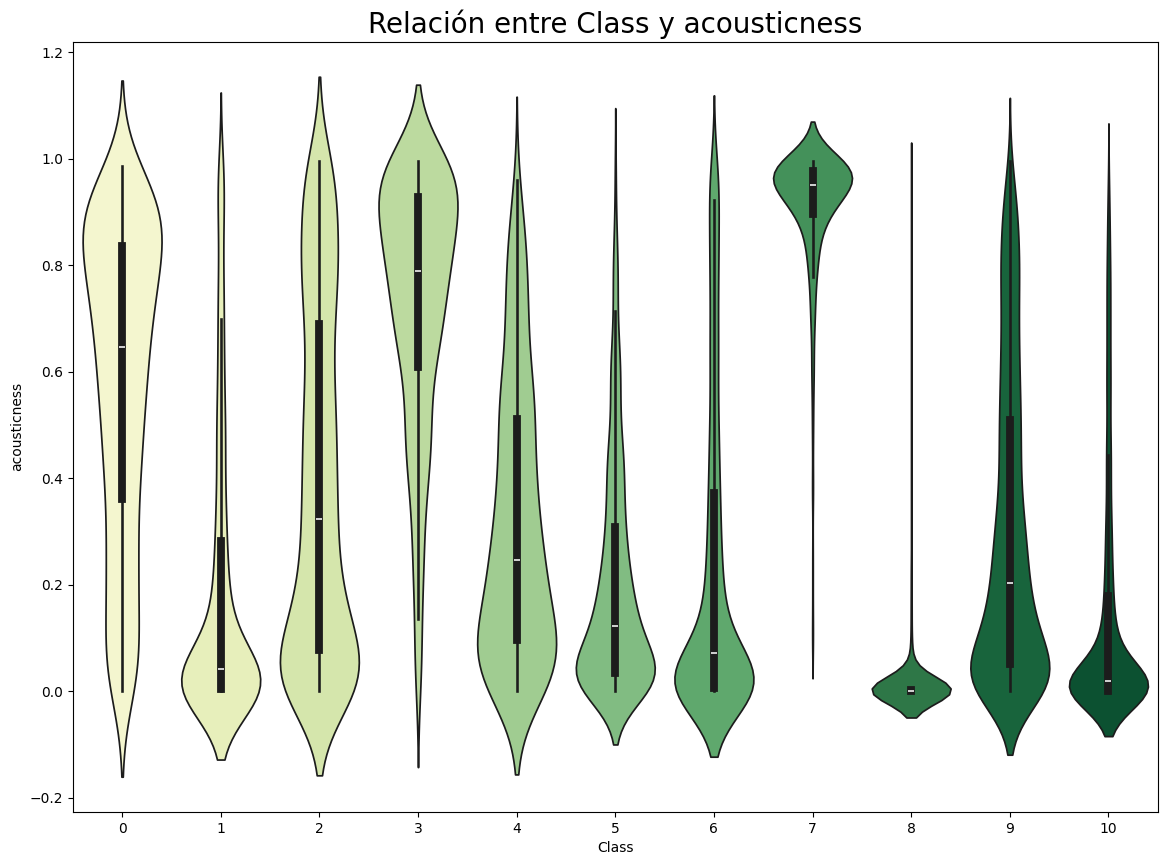

In [60]:
plt.rcParams['figure.figsize'] = (14,10)
sns.violinplot(x='Class',y='acousticness', data=numericos, palette = 'YlGn')
plt.title('Relación entre Class y acousticness', fontsize = 20, fontweight = 30)
plt.show()

Se puede observar que ciertos géneros musicales (0 -"acoustic"- y 7- "instrumental"-) muestran valores altos de "acousticness" mientras otros, lógicamente, muestran valores bajos.

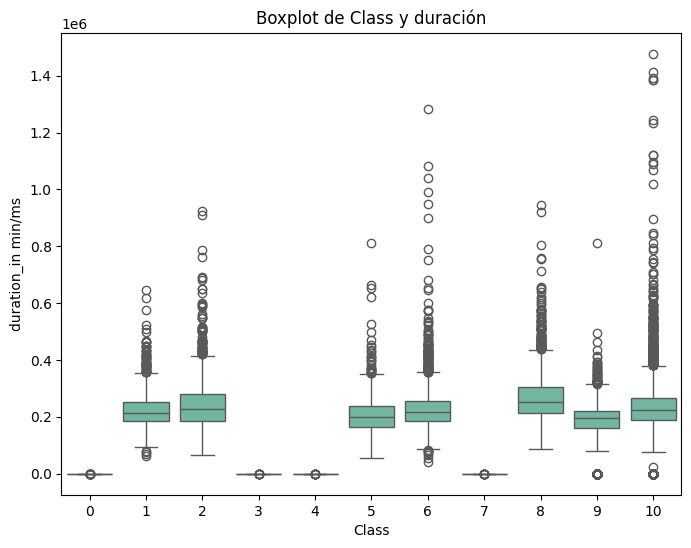

In [61]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Class', y='duration_in min/ms', data=numericos)
plt.title('Boxplot de Class y duración')
plt.show()

Se osberva que, si bien lógicamente la duración de las canciones no es un parámetro estandarizado en la composición musical, y que por tanto tendremos valores atípicos en cualquier género, existe un patrón de valores medios que transversaliza a los géneros 1, 2, 5, 6, 8, 9 y 10.
Se recomienda evaluar qué sucede con los demás géneros, es decir, determinar si existe un problema en los datos de origen o si bien se debe a algún fenómeno particular.

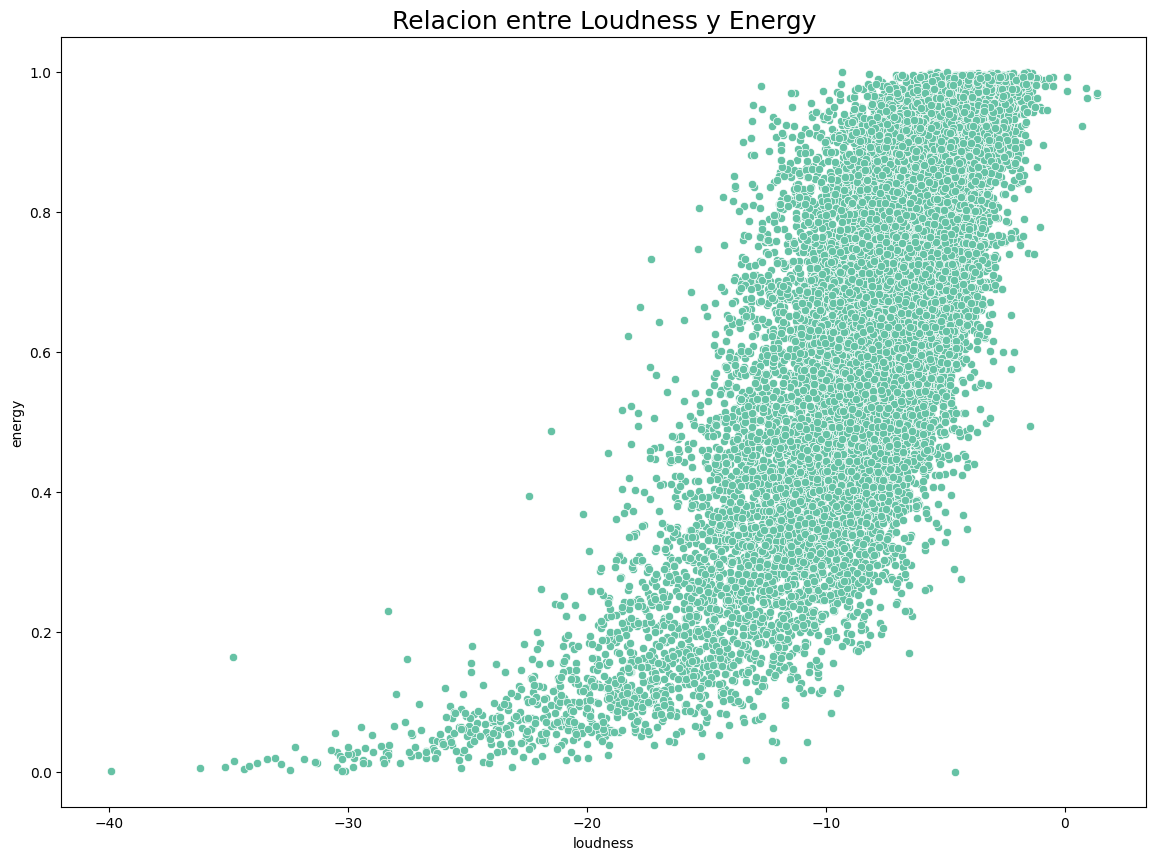

In [62]:
sns.scatterplot(x="loudness", y="energy", data=numericos)
plt.title('Relacion entre Loudness y Energy', fontsize = 18, fontweight = 30)
plt.show()

Se osberva, claramente, una acentuada correlación positiva entre estas dos variables.

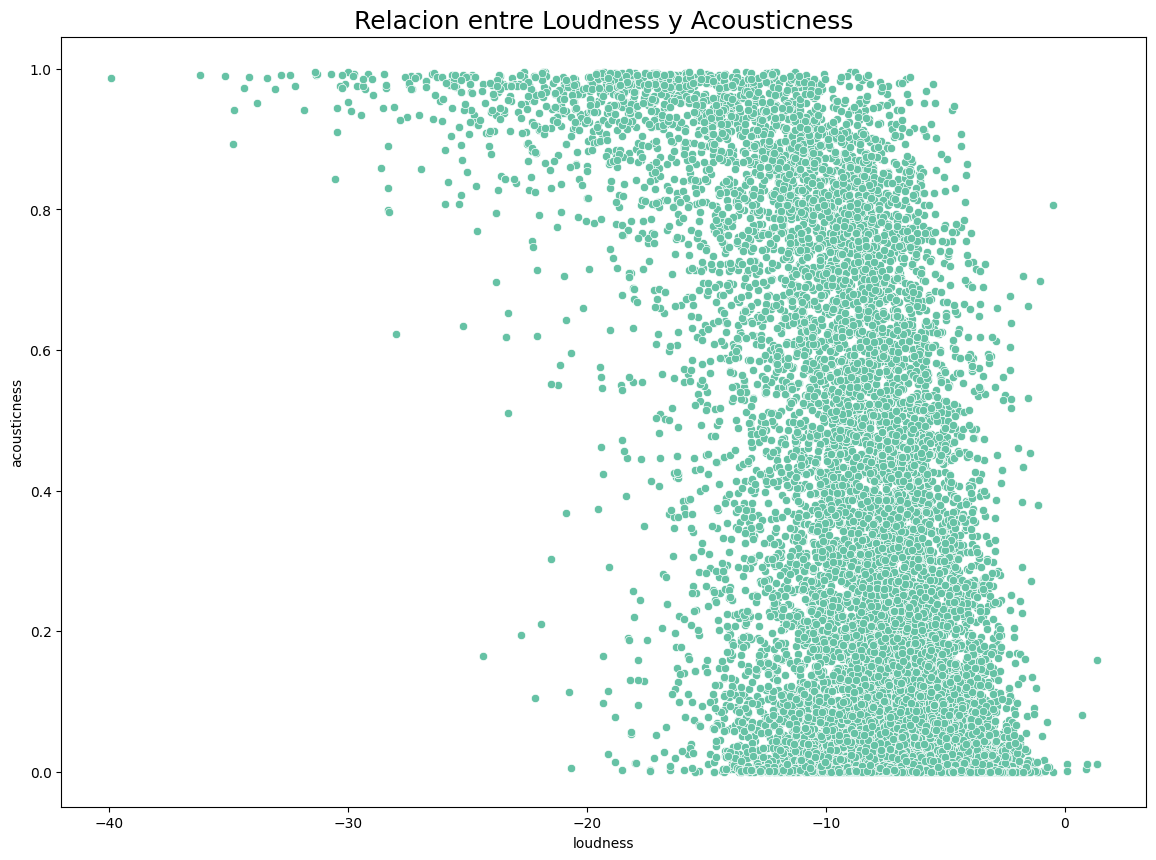

In [63]:
sns.scatterplot(x="loudness", y="acousticness", data=numericos)
plt.title('Relacion entre Loudness y Acousticness', fontsize = 18, fontweight = 30)
plt.show()

En este caso, en cambio, se observa que existe una correlación pero de tipo negativa: mientras más "ruidosa" son las canciones, menos "acústicas" son.

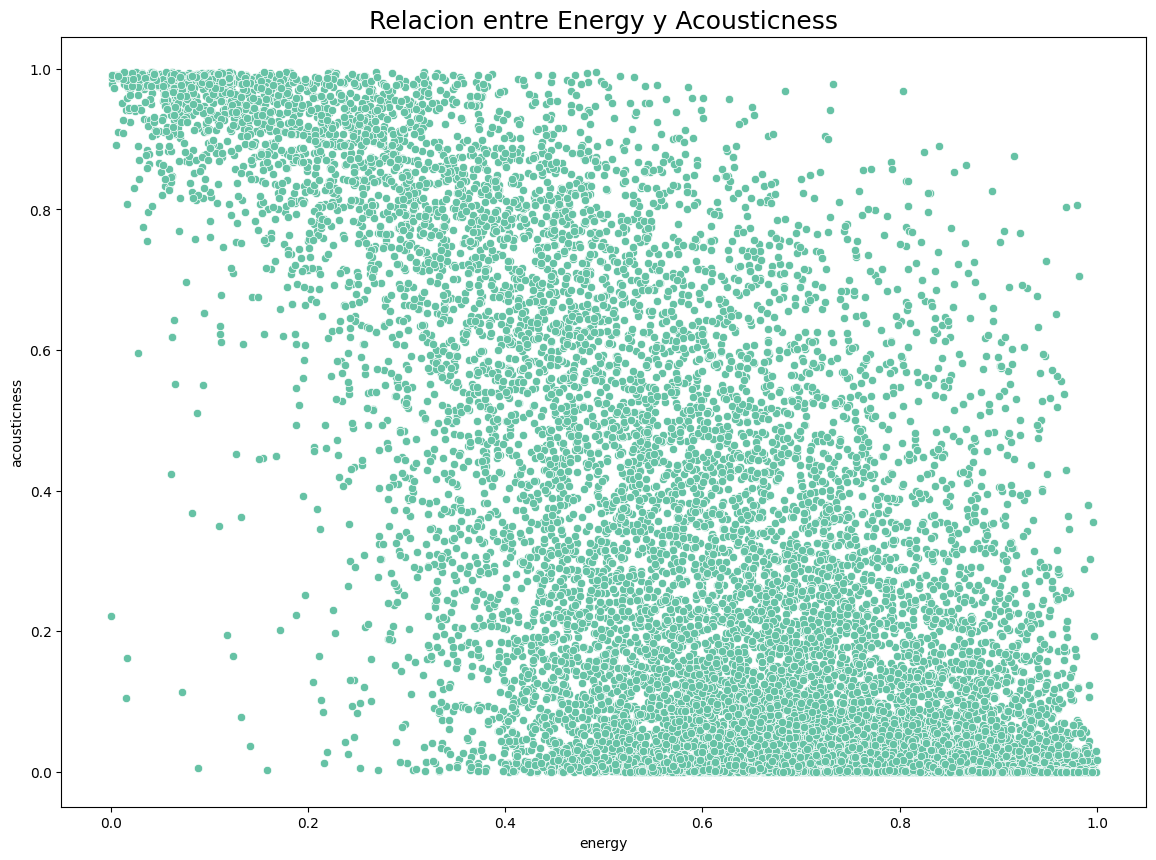

In [64]:
sns.scatterplot(x="energy", y="acousticness", data=numericos)
plt.title('Relacion entre Energy y Acousticness', fontsize = 18, fontweight = 30)
plt.show()

En este gráfico, se observa, de formar similar al anterior, una correlación negativa entre estas dos variables.

<ipython-input-65-28a292b052db>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




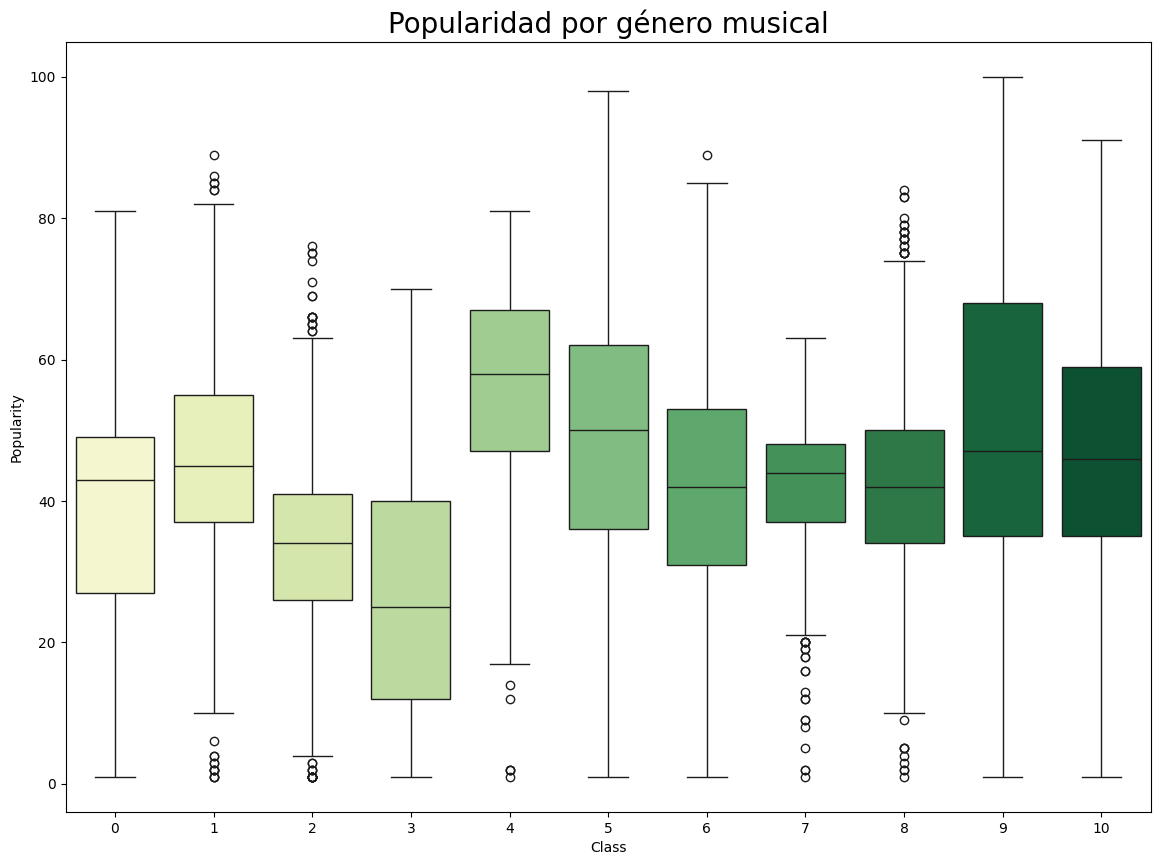

In [65]:
plt.rcParams['figure.figsize'] = (14,10)
sns.boxplot(x='Class', y='Popularity', data=numericos, palette = 'YlGn')
plt.title('Popularidad por género musical', fontsize = 20)
plt.show()

Este gráfico nos muestra que si bien el género "Country" muestra mayor cantidad de registros en torno a las medidas de tendencia central y IQR más elevadas de todas las clases, "Hip Hop" y "Pop" son los géneros que alcanzan las cifras más altas de popularidad.